In [6]:
import matplotlib.pyplot as plt
import numpy as np
from custom_sepsis import *

In [7]:
names = [ "small_buff", "large_buff", "medium", "small_buff_small_expl"]

In [8]:
import os

trainings = []
for name in names:
    tr = []
    for i in range(30):
        file_path = f"data/dqn/{name}-{i}_object.pkl"
        if os.path.exists(file_path):
            tr.append(Training.load(file_path))
    trainings.append(tr)

In [9]:
name_to_symbol = {
    "large_buff": "DQN_L",
    "small_buff": "DQN_S",
    "medium": "DQN_M",
    "small_buff_small_expl": "DQN_SS"
}

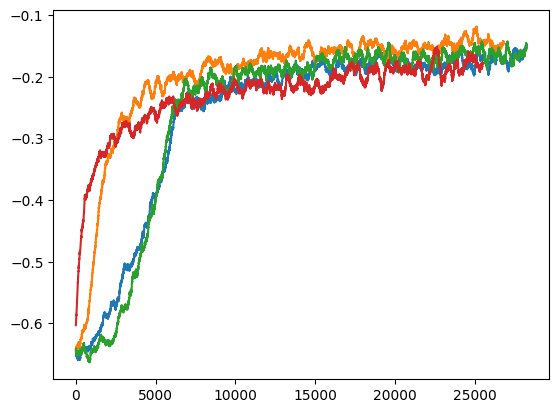

In [12]:
import json
for (i, name) in enumerate(names):
    tr = trainings[i] 
    episode_rewards = [[np.sum(ep.rewards) for ep in t.episodes] for t in tr]
    min_length = min(len(rewards) for rewards in episode_rewards)
    mean_reward = np.mean([rewards[:min_length] for rewards in episode_rewards], axis=0)
    # plt.plot(mean_reward)
    # plt.show()

    mean_rewards = [float(x) for x in mean_reward]
    # Compute missing values
    window_size = 200
    smoothed_mean = np.convolve(mean_reward, np.ones(window_size)/window_size, mode='valid')
    
    
    smoothed_std = np.std([np.convolve(rewards[:min_length], np.ones(window_size)/window_size, mode='valid') for rewards in episode_rewards], axis=0)
    keys_of_smoothed = list(range(len(smoothed_mean)))


    # Create the structure
    means_type = {
        "individual_runs": [[float(x) for x in ep] for ep in episode_rewards],
        "mean_rewards": mean_rewards,
        "smoothed_mean": [float(x) for x in smoothed_mean],
        "smoothed_std": [float(x) for x in smoothed_std],
        "keys_of_smoothed": keys_of_smoothed,
        "name": name_to_symbol[name],
        "info": {}
    }

    # Save as JSON
    with open(f"json/dqn/{name}.json", 'w') as f:
        json.dump(means_type, f)
    plt.plot(smoothed_mean)
    # plt.show()
plt.show()
